# Baby Name Analysis
Demonstrate the analysis of US baby name data collected every year for the nation and by state.

## Introduction

A Jupyter notebook to explore baby names (names, by year, by gender, by state) as a basis to learn more about data preparation, data visualization, and data analysis using Python, Pandas, matplotlib and iPython (Jupyter) notebooks

Borrowed heavily from the Kaggle workbooks, enhanced with data profiling.

## Install
This workbook is based on https://github.com/dmoore247/jupyterlab plus these packages:

In [73]:
%%sh
# conda install --yes -c conda-forge matplotlib pandas scipy

In [74]:
%%sh
# pip install pandas_profiling

In [75]:
# Tell Jupyter to inline plots
%matplotlib inline

In [76]:
# Verify data file
# SQLLite database downloaded from: https://www.kaggle.com/kaggle/us-baby-names
database='/data/babynames/database.sqlite'
%env database database
%ls  $database

env: database=database
/data/babynames/database.sqlite


In [77]:
# imports
import warnings
warnings.filterwarnings("ignore", message="axes.color_cycle is deprecated")
import numpy as np
import pandas as pd
import scipy as sp
# import seaborn as sns
import sqlite3
import matplotlib.pyplot as plt

In [78]:
# explore sqlite contents using sqlite3. A minimally sql compliant data store.
con = sqlite3.connect( database )
cursor = con.cursor()

In [79]:
# list table names
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('NationalNames',), ('StateNames',)]


In [80]:
# helper method to load the data
def load(what='NationalNames'):
    df = pd.read_sql_query("SELECT Name, Year, Gender, Count FROM NationalNames WHERE Year >= 1950",con)
    return df

In [81]:
# Actually load the data from the datafile
df = load(what='NationalNames')
df.tail(5) #sample last 5 names

,Name,Year,Gender,Count
1363507,Zykeem,2014,M,5
1363508,Zymeer,2014,M,5
1363509,Zymiere,2014,M,5
1363510,Zyran,2014,M,5
1363511,Zyrin,2014,M,5


In [82]:
df = df[['Name','Count','Year','Gender']].groupby(['Name','Gender'])
df.head(5)

,Name,Count,Year,Gender
0,Linda,80431,1950,F
1,Mary,65460,1950,F
2,Patricia,47945,1950,F
3,Barbara,41558,1950,F
4,Susan,38022,1950,F
5,Nancy,29621,1950,F
6,Deborah,29071,1950,F
7,Sandra,28893,1950,F
8,Carol,26159,1950,F
9,Kathleen,25699,1950,F


In [83]:
# keep only rows with series length 65 years and with enough babies.
df = df.filter(lambda x: len(x) == 65 and sum(x.Count) > 5000)

In [84]:
df.head(10)

,Name,Count,Year,Gender
0,Linda,80431,1950,F
1,Mary,65460,1950,F
2,Patricia,47945,1950,F
3,Barbara,41558,1950,F
4,Susan,38022,1950,F
5,Nancy,29621,1950,F
6,Deborah,29071,1950,F
7,Sandra,28893,1950,F
8,Carol,26159,1950,F
9,Kathleen,25699,1950,F


In [85]:
print (type(df))
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
               Count           Year
count  132145.000000  132145.000000
mean     1477.537985    1982.000000
std      4609.605042      18.761734
min         5.000000    1950.000000
25%        98.000000    1966.000000
50%       260.000000    1982.000000
75%       896.000000    1998.000000
max     92709.000000    2014.000000


In [86]:
# https://github.com/JosPolfliet/pandas-profiling
import pandas_profiling

In [87]:
pandas_profiling.ProfileReport(df)
profile = pandas_profiling.ProfileReport(df)
profile.to_file(outputfile="babynames-profile.html")

In [88]:
%ls -alt baby*

-rw-r--r--@ 1 dmoore-apple  staff  129942 Dec 20 18:58 babynames-profile.html


In [89]:
# top ten names across full history
glob_freq = (df.groupby('Name')
             .agg({'Count': 'sum'})
             .sort_values('Count', ascending=False))


In [90]:
# %matplotlib notebook

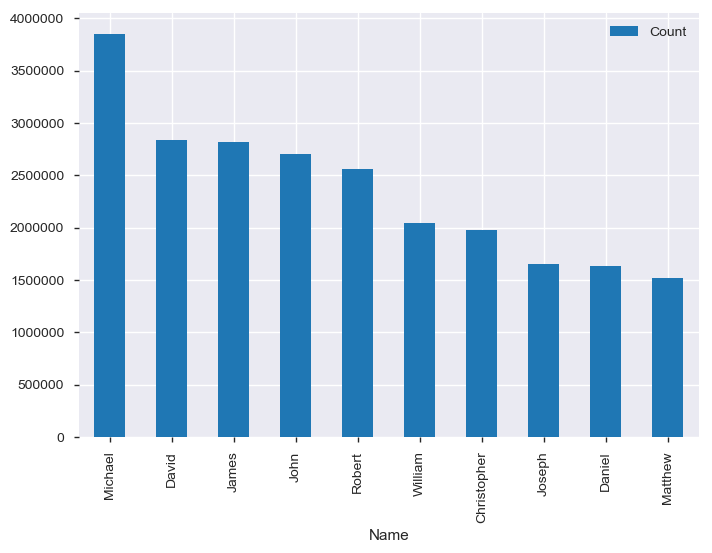

In [91]:
# bar chart
glob_freq[['Count']].head(10).plot(kind='bar')

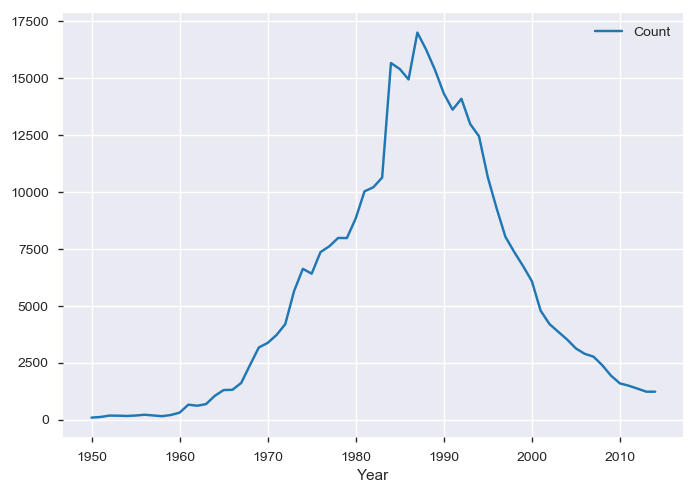

In [92]:
# plot timeseries for Danielle
y1 = df.query('Name=="Danielle"')[['Year', 'Name', 'Count']].groupby('Year').sum()
y1.plot()

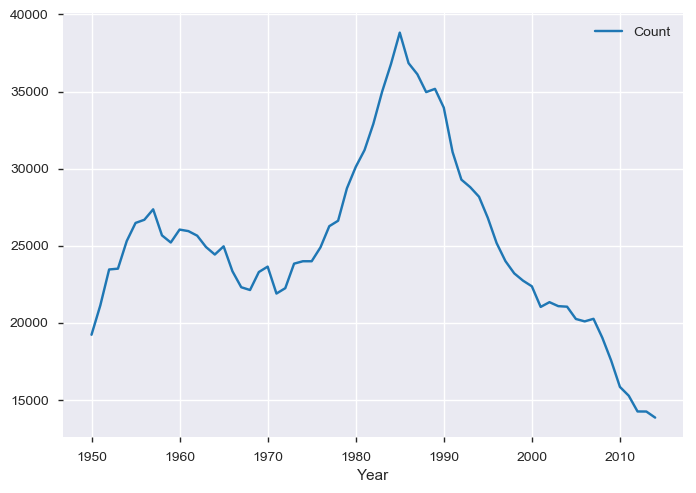

In [93]:
y2 = df.query('Name=="Daniel"')[['Year', 'Name', 'Count']].groupby('Year').sum()
y2.plot()

In [94]:
# start cross correlation analysis

In [95]:
table = df.pivot_table(index='Year', columns=['Name','Gender'], values='Count').fillna(0)

In [96]:
table.head(10)

Name,Aaron,Abbey,Abbie,Abby,Abel,Abigail,Abraham,Abram,Ace,Ada,...,Yolanda,Yvette,Yvonne,Zachary,Zachery,Zack,Zackary,Zackery,Zane,Zoe
Gender,M,F,F,F,M,F,M,M,M,F,...,F,F,F,M,M,M,M,M,M,F
Year,,,,,,,,,,,,,,,,,,,,,
1950,797,7,68,70,170,111,299,37,14,473,...,1566,318,3244,149,5,37,5,7,70,67
1951,868,16,57,82,184,137,283,40,24,513,...,1639,338,3531,152,9,34,6,5,73,96
1952,938,15,75,94,163,152,253,35,17,481,...,1776,403,3626,172,6,38,10,7,74,100
1953,897,11,71,85,219,167,315,33,22,438,...,1808,469,3687,162,11,40,17,7,101,96
1954,974,12,71,108,224,148,303,32,19,443,...,1961,501,3557,200,11,35,12,14,105,118
1955,1097,24,95,108,215,181,288,36,18,433,...,2054,564,3548,280,25,40,16,16,108,120
1956,1277,11,93,117,212,189,305,46,17,397,...,2272,864,3584,273,24,29,15,20,123,92
1957,1340,22,120,168,234,188,273,53,22,393,...,2331,793,3643,290,25,35,19,11,166,143


In [97]:
# run cross correlation of one name series against every other. This is memory intensive.
# this will produce a symetric matrix
xc = table.corr()

In [98]:
xc.head(10)

,Name,Aaron,Abbey,Abbie,Abby,Abel,Abigail,Abraham,Abram,Ace,Ada,...,Yolanda,Yvette,Yvonne,Zachary,Zachery,Zack,Zackary,Zackery,Zane,Zoe
,Gender,M,F,F,F,M,F,M,M,M,F,...,F,F,F,M,M,M,M,M,M,F
Name,Gender,,,,,,,,,,,,,,,,,,,,,
Aaron,M,1.000000,0.697309,0.503953,0.642936,0.231730,0.245342,0.416542,0.197308,0.010820,-0.561383,...,-0.466993,-0.340817,-0.794670,0.684765,0.650079,0.238343,0.495494,0.596568,0.231065,0.101261
Abbey,F,0.697309,1.000000,0.903467,0.951841,0.364126,0.692412,0.719009,0.325421,0.092949,-0.365845,...,-0.806767,-0.567320,-0.818104,0.923513,0.854627,0.597337,0.922879,0.926262,0.646629,0.504467
Abbie,F,0.503953,0.903467,1.000000,0.967642,0.532678,0.895422,0.886200,0.569298,0.341673,-0.058523,...,-0.868912,-0.647790,-0.819031,0.763874,0.652742,0.831006,0.906659,0.807881,0.851612,0.764849
Abby,F,0.642936,0.951841,0.967642,1.000000,0.471913,0.805691,0.831746,0.491315,0.249317,-0.213295,...,-0.851601,-0.599018,-0.861429,0.820098,0.713253,0.740325,0.890034,0.832939,0.758549,0.650772
Abel,M,0.231730,0.364126,0.532678,0.471913,1.000000,0.716271,0.817115,0.948109,0.919970,0.554290,...,-0.652904,-0.512269,-0.653308,0.299703,0.195572,0.719938,0.444135,0.305134,0.813538,0.825051
Abigail,F,0.245342,0.692412,0.895422,0.805691,0.716271,1.000000,0.959547,0.774083,0.614562,0.276805,...,-0.811598,-0.623155,-0.754757,0.556886,0.435016,0.959495,0.821892,0.643261,0.983430,0.957444
Abraham,M,0.416542,0.719009,0.886200,0.831746,0.817115,0.959547,1.000000,0.857194,0.703483,0.275040,...,-0.874457,-0.683137,-0.859698,0.607557,0.482907,0.947881,0.799139,0.650353,0.969377,0.926862
Abram,M,0.197308,0.325421,0.569298,0.491315,0.948109,0.774083,0.857194,1.000000,0.941162,0.611760,...,-0.667520,-0.563319,-0.660887,0.213954,0.091846,0.822539,0.415100,0.237972,0.845590,0.880591


In [99]:
# Profile the data set
xc.describe()

Name,Aaron,Abbey,Abbie,Abby,Abel,Abigail,Abraham,Abram,Ace,Ada,...,Yolanda,Yvette,Yvonne,Zachary,Zachery,Zack,Zackary,Zackery,Zane,Zoe
Gender,M,F,F,F,M,F,M,M,M,F,...,F,F,F,M,M,M,M,M,M,F
count,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,...,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000
mean,-0.056088,-0.034438,-0.022249,-0.030709,-0.018279,-0.018706,-0.025709,-0.019625,-0.007364,0.028865,...,0.025298,0.028149,0.054789,-0.027534,-0.023580,-0.015211,-0.023578,-0.025445,-0.016905,-0.014510
std,0.590820,0.626589,0.650745,0.654214,0.565937,0.658837,0.695115,0.585005,0.494822,0.434789,...,0.632323,0.499113,0.714154,0.580826,0.519985,0.644427,0.628796,0.582104,0.662943,0.628037
min,-0.917754,-0.856658,-0.892528,-0.896336,-0.845662,-0.950860,-0.972681,-0.929060,-0.833821,-0.904283,...,-0.910295,-0.793382,-0.961639,-0.826286,-0.764474,-0.929747,-0.882851,-0.808855,-0.959578,-0.929525
25%,-0.722773,-0.683595,-0.662053,-0.712867,-0.545086,-0.625378,-0.706445,-0.549711,-0.398391,-0.339346,...,-0.655086,-0.497155,-0.650881,-0.615699,-0.536217,-0.610935,-0.637232,-0.602354,-0.625158,-0.568247
50%,0.013113,-0.069200,-0.136240,-0.087593,-0.195624,-0.253908,-0.171085,-0.198097,-0.241701,0.096678,...,0.147600,0.076755,-0.044281,-0.090537,-0.093154,-0.236426,-0.164203,-0.121941,-0.248740,-0.266743
75%,0.468071,0.595026,0.658606,0.643589,0.536765,0.697263,0.736235,0.562803,0.410405,0.327841,...,0.623465,0.446102,0.862458,0.521085,0.436342,0.694045,0.620642,0.543271,0.722703,0.673168
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [100]:
# filter out bad matches, with correlation <= 0.8
xc1 = xc.applymap(lambda x: x if x > 0.8 else np.nan)

In [101]:
xc1.head(10)

,Name,Aaron,Abbey,Abbie,Abby,Abel,Abigail,Abraham,Abram,Ace,Ada,...,Yolanda,Yvette,Yvonne,Zachary,Zachery,Zack,Zackary,Zackery,Zane,Zoe
,Gender,M,F,F,F,M,F,M,M,M,F,...,F,F,F,M,M,M,M,M,M,F
Name,Gender,,,,,,,,,,,,,,,,,,,,,
Aaron,M,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Abbey,F,NaN,1.000000,0.903467,0.951841,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.923513,0.854627,NaN,0.922879,0.926262,NaN,NaN
Abbie,F,NaN,0.903467,1.000000,0.967642,NaN,0.895422,0.886200,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.831006,0.906659,0.807881,0.851612,NaN
Abby,F,NaN,0.951841,0.967642,1.000000,NaN,0.805691,0.831746,NaN,NaN,NaN,...,NaN,NaN,NaN,0.820098,NaN,NaN,0.890034,0.832939,NaN,NaN
Abel,M,NaN,NaN,NaN,NaN,1.000000,NaN,0.817115,0.948109,0.919970,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.813538,0.825051
Abigail,F,NaN,NaN,0.895422,0.805691,NaN,1.000000,0.959547,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.959495,0.821892,NaN,0.983430,0.957444
Abraham,M,NaN,NaN,0.886200,0.831746,0.817115,0.959547,1.000000,0.857194,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.947881,NaN,NaN,0.969377,0.926862
Abram,M,NaN,NaN,NaN,NaN,0.948109,NaN,0.857194,1.000000,0.941162,NaN,...,NaN,NaN,NaN,NaN,NaN,0.822539,NaN,NaN,0.845590,0.880591


In [102]:
# filter out lower triangle (correlation matrix is symetric)
xc2 = xc1.mask(np.tril(np.ones(xc.shape)).astype(np.bool))

In [103]:
xc2.head(20)

,Name,Aaron,Abbey,Abbie,Abby,Abel,Abigail,Abraham,Abram,Ace,Ada,...,Yolanda,Yvette,Yvonne,Zachary,Zachery,Zack,Zackary,Zackery,Zane,Zoe
,Gender,M,F,F,F,M,F,M,M,M,F,...,F,F,F,M,M,M,M,M,M,F
Name,Gender,,,,,,,,,,,,,,,,,,,,,
Aaron,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Abbey,F,NaN,NaN,0.903467,0.951841,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.923513,0.854627,NaN,0.922879,0.926262,NaN,NaN
Abbie,F,NaN,NaN,NaN,0.967642,NaN,0.895422,0.886200,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.831006,0.906659,0.807881,0.851612,NaN
Abby,F,NaN,NaN,NaN,NaN,NaN,0.805691,0.831746,NaN,NaN,NaN,...,NaN,NaN,NaN,0.820098,NaN,NaN,0.890034,0.832939,NaN,NaN
Abel,M,NaN,NaN,NaN,NaN,NaN,NaN,0.817115,0.948109,0.919970,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.813538,0.825051
Abigail,F,NaN,NaN,NaN,NaN,NaN,NaN,0.959547,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.959495,0.821892,NaN,0.983430,0.957444
Abraham,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.857194,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.947881,NaN,NaN,0.969377,0.926862
Abram,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.941162,NaN,...,NaN,NaN,NaN,NaN,NaN,0.822539,NaN,NaN,0.845590,0.880591


In [104]:
# turn correlation matrix into a lengthy table with (from name, from gender, to name, to gender), drop the NaN rows
s = xc2.unstack(level=0).unstack().dropna()

In [105]:
# create sorted series in descending order of correlation
so = s.sort_values(ascending=False)

In [106]:
# display to 10 items
so.head(10)

Name     Gender  Name     Gender
Joyce    F       Doris    F         0.999250
Tom      M       Jim      M         0.999243
Harold   M       George   M         0.998971
Robert   M       James    M         0.998846
Rita     F       Jean     F         0.998805
Leroy    M       Eugene   M         0.998773
Dorothy  F       Delores  F         0.998731
Delores  F       Barbara  F         0.998696
Wayne    M       Donald   M         0.998686
Earl     M       Alfred   M         0.998670
dtype: float64

### Get the top two most similar timeseries

In [107]:
# get the top two most similar timeseries
index=0 # top name pair
names = (so.index[index][0], so.index[index][2])
f1 = 'Name=="' + names[0] + '"'
f2 = 'Name=="' + names[1] + '"'
print (names, f1, f2)
y1 = df.query(f1)[['Year', 'Count']].groupby('Year').sum()
y2 = df.query(f2)[['Year', 'Count']].groupby('Year').sum()

('Joyce', 'Doris') Name=="Joyce" Name=="Doris"


### Plot the name plots side by side for comparison's sake

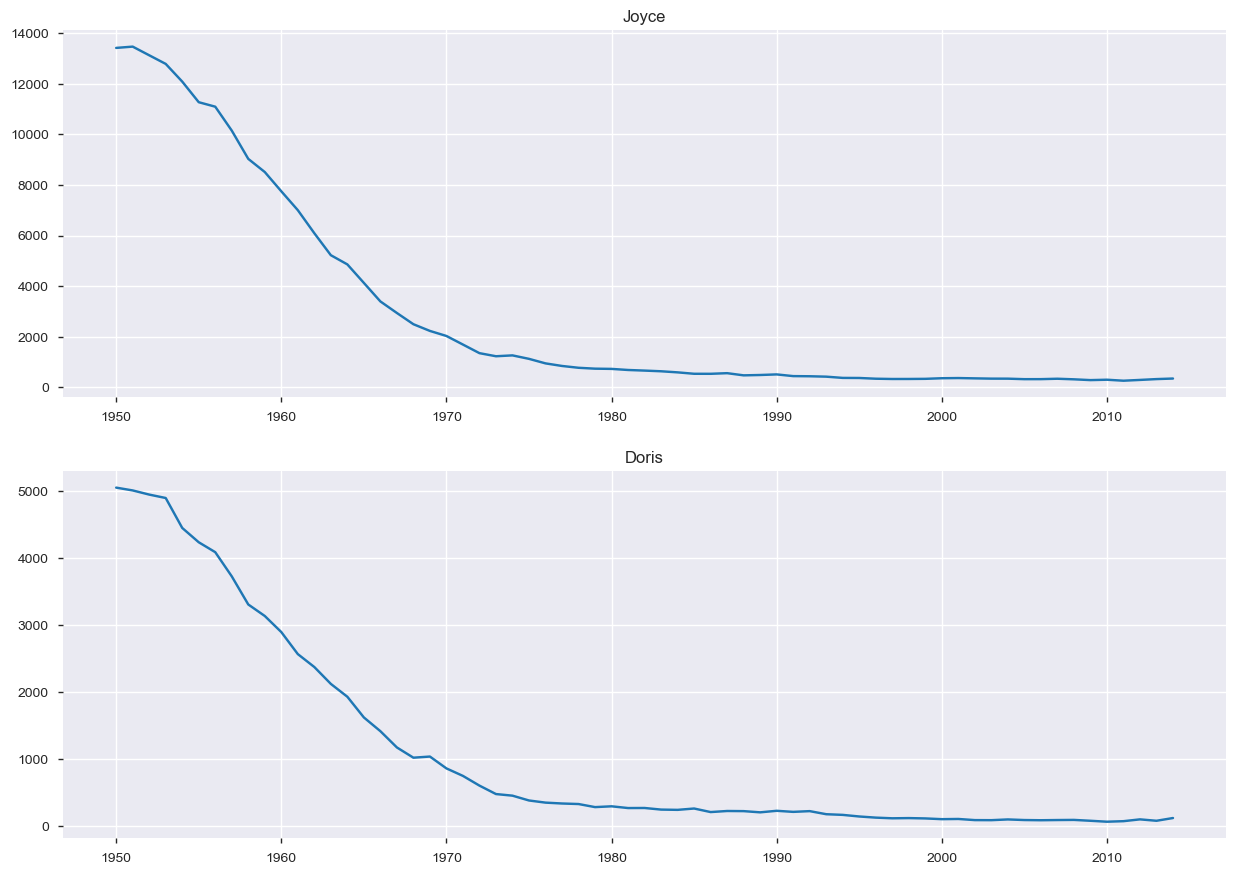

In [108]:
#Plot the two time series
size=15
fig, ax = plt.subplots(2, 1, sharex='col', figsize=(size, size*.7))

plt.subplot(2,1,1)
plt.plot(y1)
plt.title(str(so.index[index][0]))
plt.subplot(2,1,2)
plt.plot(y2)
plt.title(so.index[index][2])
plt.show()